In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [127]:
file_path = '../data/best_selling_artists.csv'
artist = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

### 데이터 원본분석

In [128]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         121 non-null    object
 1   Country        121 non-null    object
 2   period_active  121 non-null    object
 3   Year           121 non-null    int64 
 4   Genre          121 non-null    object
 5   TCU            121 non-null    object
 6   Sales          121 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.7+ KB


In [132]:
artist.columns

Index(['Artist', 'Country', 'period_active', 'Year', 'Genre', 'TCU', 'Sales'], dtype='object')

* Artist          : 아티스트 이름
* Country         : 아티스트가 출신 국가
* period_active   : 아티스트가 음악을 만든 시간
* Year            : 음반차트 첫 진입년도
* Genre           : 아티스트의 음악 장르
* TCU             : 인증받은 판매량
* Sales           : 알려진 판매량 

In [129]:
artist.shape

(121, 7)

In [130]:
artist.head(10)

,Artist,Country,period_active,Year,Genre,TCU,Sales
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290.4 million,600 million500 million
1,Elvis Presley,United States,1954–1977,1956,Rock and roll / pop / country,231.2 million,500 million
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277.3 million,400 million
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208 million,300 million250 million
4,Queen,United Kingdom,1971–present,1973,Rock,184 million,300 million250 million
5,Madonna,United States,1979–present,1983,Pop / dance / electronica,181.7 million,300 million250 million
6,Led Zeppelin,United Kingdom,1968–1980,1969,Hard rock / blues rock / folk rock,142.4 million,300 million200 million
7,Rihanna,Barbados,2005–present,2005,R&B / pop / dance / hip-hop,335.3 million,250 million230 million
8,Pink Floyd,United Kingdom,"1965–1996, 2005, 2012–2014",1967,Progressive rock / psychedelic rock,123.8 million,250 million200 million
9,Eminem,United States,1996–present,1999,Hip-hop,325.7 million,220 million


In [131]:
artist.tail(10)

,Artist,Country,period_active,Year,Genre,TCU,Sales
111,Kenny G,United States,1982–present,1984,Smooth jazz,53.9 million,75 million
112,Green Day,United States,1987–present,1994,Punk rock / pop punk / alternative rock,53 million,75 million
113,Enya,Ireland,1982–present,1987,New-age / Celtic,51.9 million,75 million
114,Bryan Adams,Canada,1979–present,1979,Rock,49.9 million,75 million
115,Bob Marley,Jamaica,1962–1981,1975,Reggae,46.3 million,75 million
116,The Police,United Kingdom,1977–19862007–2008,1978,Pop / rock,42.2 million,75 million
117,Gloria Estefan,United States,1975–present,1984,Latin pop / dance pop,37.6 million,75 million
118,Barry Manilow,United States,1973–present,1973,Pop / soft rock,36.7 million,75 million
119,Kiss,United States,1972–present,1974,Hard rock / heavy metal,28.7 million,75 million
120,Aretha Franklin,United States,1956–2018,1961,Soul / jazz / blues / R&B,26.6 million,75 million


#### => 'sales'는 인증되지않은판매량이므로 인증된 수치인 'TCU'만 사용

In [133]:
artist = artist.drop(['Sales'], axis = 1)

In [134]:
artist

,Artist,Country,period_active,Year,Genre,TCU
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290.4 million
1,Elvis Presley,United States,1954–1977,1956,Rock and roll / pop / country,231.2 million
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277.3 million
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208 million
4,Queen,United Kingdom,1971–present,1973,Rock,184 million
...,...,...,...,...,...,...
116,The Police,United Kingdom,1977–19862007–2008,1978,Pop / rock,42.2 million
117,Gloria Estefan,United States,1975–present,1984,Latin pop / dance pop,37.6 million
118,Barry Manilow,United States,1973–present,1973,Pop / soft rock,36.7 million
119,Kiss,United States,1972–present,1974,Hard rock / heavy metal,28.7 million


### 결측치, 이상치 점검

In [135]:
artist['TCU'] = artist.TCU.str.split(' ').str[0].astype('float64')

In [136]:
artist['TCU'] = artist['TCU']*1000000

In [137]:
artist['TCU']

0      290400000.0
1      231200000.0
2      277300000.0
3      208000000.0
4      184000000.0
          ...     
116     42200000.0
117     37600000.0
118     36700000.0
119     28700000.0
120     26600000.0
Name: TCU, Length: 121, dtype: float64

In [138]:
artist.isnull().sum()

Artist           0
Country          0
period_active    0
Year             0
Genre            0
TCU              0
dtype: int64

In [140]:
artist[artist['Country'].map(len) < 3]

,Artist,Country,period_active,Year,Genre,TCU


* 나라별 인기있는 장르
* 년도별 어떤 장르가 인기있었는지 ..
* 오랜시간동안 차트인 하지못한 가수 

In [174]:
artist['Debut']=artist.period_active.str.split('–').str[0].astype('int64')

In [175]:
artist['Year']=artist['Year'].astype('int64')

In [176]:
artist['Cart_In_period']=artist['Year']-artist['Debut']

In [177]:
sort_by_cartin=artist[['Artist','Cart_In_period']]
sort_by_cartin=sort_by_cartin.sort_values('Cart_In_period',ascending=0)
sort_by_cartin.head()

,Artist,Cart_In_period
61,Kenny Rogers,17
87,Lionel Richie,13
115,Bob Marley,13
59,Paul McCartney,10
89,Justin Timberlake,10


In [149]:
cartin_avg=sort_by_cartin['Cart_In_period'].mean()

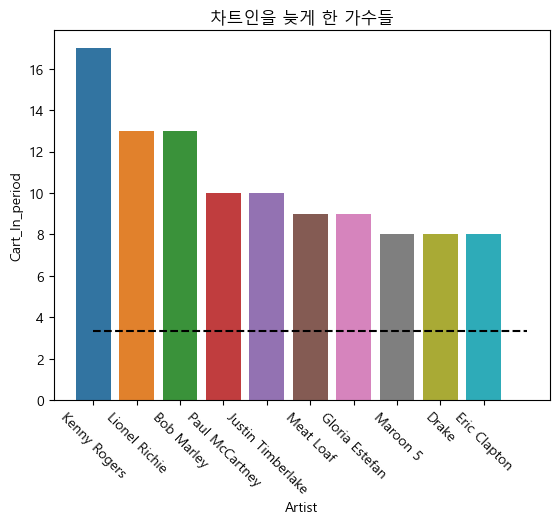

In [157]:
plt.title('차트인을 늦게 한 가수들')
plt.xticks(rotation = -45)
sns.barplot(x='Artist',y='Cart_In_period',data=sort_by_cartin.head(10))
plt.plot([0,10], [cartin_avg, cartin_avg], "k--")
plt.show()

In [158]:
artist['Genre'].unique()

array(['Rock / pop', 'Rock and roll / pop / country',
       'Pop / rock / dance / soul / R&B', 'Pop / rock', 'Rock',
       'Pop / dance / electronica', 'Hard rock / blues rock / folk rock',
       'R&B / pop / dance / hip-hop',
       'Progressive rock / psychedelic rock', 'Hip-hop',
       'R&B / pop / soul / hip-hop',
       'Pop / country / rock / folk / alternative', 'R&B / pop',
       'R&B / soul / pop / gospel', 'Pop / Rock',
       'Hard rock / blues rock / rock and roll', 'Rock / blues rock',
       'Hip-hop / R&B / pop', 'Country', 'Hip-hop / electronic / pop',
       'Pop / teen pop / dance pop', 'Pop / folk pop', 'Pop rock / R&B',
       'Hard rock', 'Rock / progressive rock / adult contemporary',
       'Pop / adult contemporary', 'Pop / disco',
       'Pop / swing / easy listening', 'Pop', 'Pop / R&B / hip-hop',
       'Heavy metal / thrash metal', 'Pop / dance / electronic',
       'Pop rock / funk rock / dance-pop', 'Pop / soul',
       'Funk rock / alternative rock',

In [173]:
# genre_list=[]
# for genre in artist['Genre'].unique():
#     for 
#     print(genre.split("/"))

1960년대, 1970년대 , 1980년대, 1990년대, 2000년 이후

In [242]:
# fig, axes = plt.subplots(2, 2)

# x = [i for i in range(20)]
# y = [np.random.randint(1, 10) for i in range(20)]
# axes[0][0].plot(x, y)

# x = range(20)
# y = [np.random.randint(1, 10) for i in range(20)]
# axes[0][1].bar(x, y)

# x = range(20)
# y = [np.random.randint(1, 10) for i in range(20)]
# axes[1][0].bar(x, y)

# x = range(20)
# y = [np.random.randint(1, 10) for i in range(20)]
# axes[1][1].scatter(x, y)


# plt.tight_layout()
# plt.show()

#그래프

In [192]:
artist_year_1960 = artist.loc[(artist['Year'] >= 1960) & (artist['Year'] <= 1969)]

artist_year_1960.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290400000.0,1960,2
6,Led Zeppelin,United Kingdom,1968–1980,1969,Hard rock / blues rock / folk rock,142400000.0,1968,1
8,Pink Floyd,United Kingdom,"1965–1996, 2005, 2012–2014",1967,Progressive rock / psychedelic rock,123800000.0,1965,2
17,The Rolling Stones,United Kingdom,1962–present,1963,Rock / blues rock,102700000.0,1962,1
29,Barbra Streisand,United States,1960–present,1963,Pop / adult contemporary,98400000.0,1960,3


In [163]:
artist_year_1960['Genre'].value_counts()

Rock / pop                             6
Pop                                    2
Folk / rock                            1
Rock / Hard rock/ Pop rock             1
Rock / pop / surf rock                 1
Rock / folk / country                  1
Funk / R&B / soul                      1
Art rock / glam rock / pop             1
Progressive rock / pop rock            1
Pop / rock / dance / folk              1
Psychedelic rock                       1
Hard rock / blues rock / folk rock     1
Latin                                  1
Folk rock                              1
Rock                                   1
Pop / rock                             1
Pop / disco                            1
Pop / adult contemporary               1
Rock / blues rock                      1
Progressive rock / psychedelic rock    1
Soul / jazz / blues / R&B              1
Name: Genre, dtype: int64

=> 60년대에 가장 인기있었던 장르는 Rock / pop , pop 순이다

1970년대

In [191]:
artist_year_1970 = artist.loc[(artist['Year'] >= 1970) & (artist['Year'] <= 1979)]

artist_year_1970.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277300000.0,1964,7
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208000000.0,1964,6
4,Queen,United Kingdom,1971–present,1973,Rock,184000000.0,1971,2
14,Eagles,United States,"1971–1980, 1994–present",1972,Rock,152200000.0,1971,1
16,AC/DC,Australia,1973–present,1975,Hard rock / blues rock / rock and roll,130200000.0,1973,2


In [165]:
artist_year_1970['Genre'].value_counts()

Rock                                      7
Hard rock / heavy metal                   3
Pop / rock                                3
Rock / hard rock                          2
Pop / rock / dance / soul / R&B           1
Reggae                                    1
Pop / disco / R&B                         1
Rock / pop                                1
Funk / R&B / soul                         1
Rock / soft rock                          1
Country / pop                             1
Funk / R&B / pop / soul / rock            1
Rock / blues                              1
Pop / disco                               1
Hard rock                                 1
Hard rock / blues rock / rock and roll    1
Pop / soft rock                           1
Name: Genre, dtype: int64

=> 70년대 가장 인기있었던 장르는 Rock, Hard rock / heavy metal 순이다

In [190]:
artist_year_1980 = artist.loc[(artist['Year'] >= 1980) & (artist['Year'] <= 1989)]

artist_year_1980.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
5,Madonna,United States,1979–present,1983,Pop / dance / electronica,181700000.0,1979,4
13,Whitney Houston,United States,1977–2012,1984,R&B / soul / pop / gospel,155300000.0,1977,7
15,Celine Dion,Canada,1981–present,1981,Pop / Rock,143000000.0,1981,0
19,Garth Brooks,United States,1989–present,1989,Country,165300000.0,1989,0
26,U2,Ireland,1976–present,1980,Rock,114600000.0,1976,4


In [168]:
artist_year_1980['Genre'].value_counts()

Country                                         2
Pop / dance / electronica                       1
Hard rock / heavy metal                         1
New-age / Celtic                                1
Smooth jazz                                     1
Country / pop rock                              1
Alternative rock                                1
Pop / R&B                                       1
Pop                                             1
R&B / pop                                       1
Rock / pop rock / hard rock                     1
R&B / soul / pop / gospel                       1
Hard rock / glam metal                          1
Funk rock / alternative rock                    1
Heavy metal / thrash metal                      1
Rock / progressive rock / adult contemporary    1
Rock                                            1
Pop / Rock                                      1
Latin pop / dance pop                           1
Name: Genre, dtype: int64

=> 80년대는 Country가 가장 인기있는 장르지만, 
가장 많은 데이터와 편차가 심하지않고 다른 데이터가 골고루 분산되서 많은 장르가 사랑받은것으로 보임.

1990년대

In [189]:
artist_year_1990 = artist.loc[(artist['Year'] >= 1990) & (artist['Year'] <= 1999)]

artist_year_1990.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
9,Eminem,United States,1996–present,1999,Hip-hop,325700000.0,1996,3
10,Mariah Carey,United States,1988–present,1990,R&B / pop / soul / hip-hop,205800000.0,1988,2
34,Jay-Z,United States,1996–present,1996,Hip-hop,136400000.0,1996,0
37,Lil Wayne,United States,1996–present,1999,Hip-hop,188700000.0,1996,3
46,Coldplay,United Kingdom,1996–present,1999,Alternative rock / pop rock / pop,109400000.0,1996,3


In [170]:
artist_year_1990['Genre'].value_counts()

Hip-hop                                    4
R&B / pop / soul / hip-hop                 1
Alternative rock / pop rock / pop          1
Pop / dance / dance-pop                    1
Country pop                                1
Pop                                        1
R&B / pop / rock                           1
R&B / pop                                  1
Latin pop / pop / pop rock                 1
Country                                    1
Hip-hop / R&B / dance                      1
J-pop / pop / dance / electronic           1
R&B / soul / hip-hop                       1
Grunge / alternative rock                  1
Pop rock                                   1
Punk rock / pop punk / alternative rock    1
Name: Genre, dtype: int64

=> 1990년대에 가장 인기있었던 장르는 Hip-hop이다

2000년 이후

In [188]:
artist_year_2000 = artist.loc[(artist['Year'] >= 2000)]

artist_year_2000.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
7,Rihanna,Barbados,2005–present,2005,R&B / pop / dance / hip-hop,335300000.0,2005,0
11,Taylor Swift,United States,2006–present,2006,Pop / country / rock / folk / alternative,250400000.0,2006,0
12,Beyoncé,United States,1997–present,2002,R&B / pop,226500000.0,1997,5
18,Drake,Canada,2001–present,2009,Hip-hop / R&B / pop,413060000.0,2001,8
20,Kanye West,United States,1996–present,2003,Hip-hop / electronic / pop,258300000.0,1996,7


In [172]:
artist_year_2000['Genre'].value_counts()

Hip-hop / R&B / pop                          2
Pop / R&B                                    2
Pop / R&B / hip-hop                          2
R&B / pop / dance / hip-hop                  1
Pop / soul                                   1
Pop rock / electropop / pop                  1
Hip-hop / hip house /EDM                     1
Pop / R&B / neo soul                         1
Pop / pop rock / R&B                         1
Alternative rock / nu metal / rap rock       1
Hip-hop / pop                                1
Pop / dance / electronic                     1
Pop rock / funk rock / dance-pop             1
Pop / country / rock / folk / alternative    1
Pop                                          1
Pop rock / R&B                               1
Pop / folk pop                               1
Pop / teen pop / dance pop                   1
Hip-hop / electronic / pop                   1
R&B / pop                                    1
Country / country pop                        1
Name: Genre, 

=> 2000년대 이후는 Hip-hop / R&B / pop , Pop / R&B ... 
힙합과 알앤비 장르가 인기있는 장르이다.

In [187]:
country_aritst=pd.DataFrame(artist.groupby('Country')['Artist'].count())
country_aritst.sort_values('Artist',ascending=0)

,Artist
Country,
United States,79
United Kingdom,20
Canada,5
Australia,2
Ireland,2
Japan,2
France,1
Jamaica,1
Barbados,1


In [256]:
artist.loc[artist['Country']=='United Kingdom United States','Country']='United Kingdom'

In [257]:
artist.loc[artist['Country']=='CanadaUnited States','Country']='Canada'

In [258]:
artist.loc[artist['Country']=='United StatesUnited Kingdom','Country']='United States'

In [259]:
artist.loc[artist['Country']=='United Kingdom Australia[238][239]','Country']='Australia'

In [260]:
artist['Country'].unique()

array(['United Kingdom', 'United States', 'Barbados', 'Canada',
       'Australia', 'Ireland', 'Sweden', 'Trinidad and Tobago', 'Japan',
       'Spain', 'Colombia', 'France', 'Jamaica'], dtype=object)

=>바꿔야한다

# 목표: 현재까지 활동을 하는 가수들 중 사랑받는 장르를 구한다

In [223]:
artist['Until']=artist.period_active.str.split('–').str[-1]

In [230]:
# if artist.Until.str.contains('-'):
#     artist['Until']=artist.period_active.str.split('-').str[-1]

In [232]:
artist['Until']=artist['Until'].str.replace('present','2022')

In [233]:
artist['Until'].head()

0    1970
1    1977
2    2009
3    2022
4    2022
Name: Until, dtype: object

In [240]:
present_artist=artist[artist['Until']=='2022']
present_artist['Genre'].value_counts()

Rock                                 7
Rock / pop                           4
Pop / rock                           3
R&B / pop                            3
Pop                                  3
                                    ..
Hard rock / glam metal               1
Hip-hop / pop                        1
Alternative rock / pop rock / pop    1
Pop / pop rock / R&B                 1
Pop / soft rock                      1
Name: Genre, Length: 64, dtype: int64

In [261]:
artist.groupby('Country')['Artist','Genre'].count()

C:\Users\tj\AppData\Local\Temp\ipykernel_16148\635316106.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artist.groupby('Country')['Artist','Genre'].count()


,Artist,Genre
Country,,
Australia,3,3
Barbados,1,1
Canada,6,6
Colombia,1,1
France,1,1
Ireland,2,2
Jamaica,1,1
Japan,2,2
Spain,1,1
